In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [4]:
# Step 1: Generate Hypothetical Data
np.random.seed(42)
data = {
    "TV_Ad_Spend": np.random.uniform(10000, 50000, 100),
    "Online_Ad_Spend": np.random.uniform(5000, 25000, 100),
    "Email_Marketing_Spend": np.random.uniform(1000, 10000, 100),
    "Sales": None
}

data["Sales"] = (
    0.06 * data["TV_Ad_Spend"] + 
    0.12 * data["Online_Ad_Spend"] + 
    0.10 * data["Email_Marketing_Spend"] + 
    np.random.normal(0, 5000, 100)
)

In [5]:
df = pd.DataFrame(data)  # Creating the DataFrame

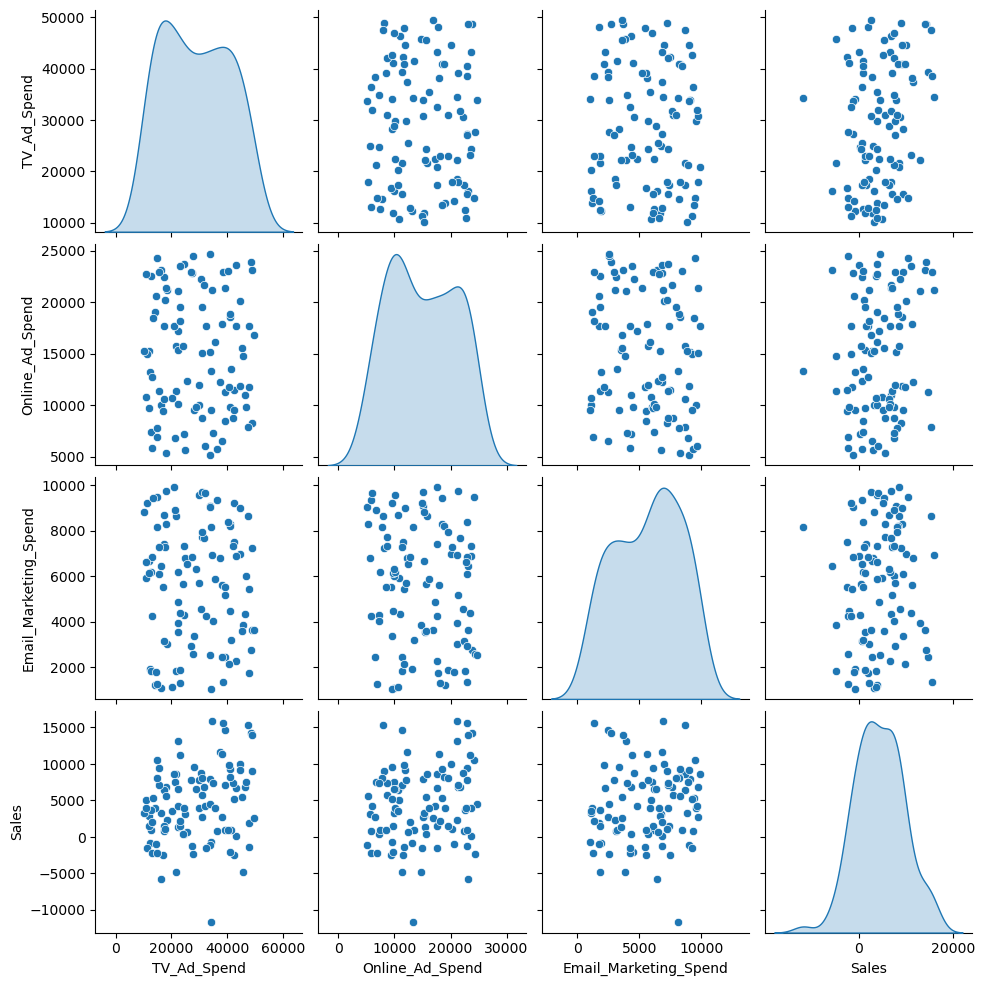

In [6]:
sns.pairplot(df, diag_kind="kde") # data visualization
plt.show()

In [9]:
# train-test split
X = df[["TV_Ad_Spend", "Online_Ad_Spend", "Email_Marketing_Spend"]]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Models

In [10]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [11]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

In [12]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

In [13]:
# Model Evaluation
def evaluate_model(model_name, y_test, preds):
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{model_name}: MSE = {mse:.2f}, R2 = {r2:.2f}")

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Ridge Regression", y_test, ridge_preds)
evaluate_model("Lasso Regression", y_test, lasso_preds)

Linear Regression: MSE = 52539489.03, R2 = -0.88
Ridge Regression: MSE = 52539489.02, R2 = -0.88
Lasso Regression: MSE = 52539487.24, R2 = -0.88


In [14]:
# Step 6: Feature Importance Analysis
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coefficients": lr_model.coef_,
    "Ridge Coefficients": ridge_model.coef_,
    "Lasso Coefficients": lasso_model.coef_
})
print(coef_df)

                 Feature  Linear Coefficients  Ridge Coefficients  \
0            TV_Ad_Spend             0.143005            0.143005   
1        Online_Ad_Spend             0.225193            0.225193   
2  Email_Marketing_Spend             0.336233            0.336233   

   Lasso Coefficients  
0            0.143005  
1            0.225193  
2            0.336233  


In [15]:
# Step 7: Optimize Marketing Budgets
def roi_optimization(x):
    return -1 * (
        0.06 * x[0] + 0.12 * x[1] + 0.10 * x[2] - (0.01 * np.sum(x))
    )

constraints = (
    {"type": "eq", "fun": lambda x: 100000 - np.sum(x)},
)
bounds = [(0, 50000), (0, 25000), (0, 10000)]
initial_guess = [25000, 12500, 5000]
result = minimize(roi_optimization, initial_guess, bounds=bounds, constraints=constraints)

optimized_budget = result.x
print(f"Optimized Budgets: TV = {optimized_budget[0]:.2f}, Online = {optimized_budget[1]:.2f}, Email = {optimized_budget[2]:.2f}")

Optimized Budgets: TV = 50000.00, Online = 25000.00, Email = 10000.00


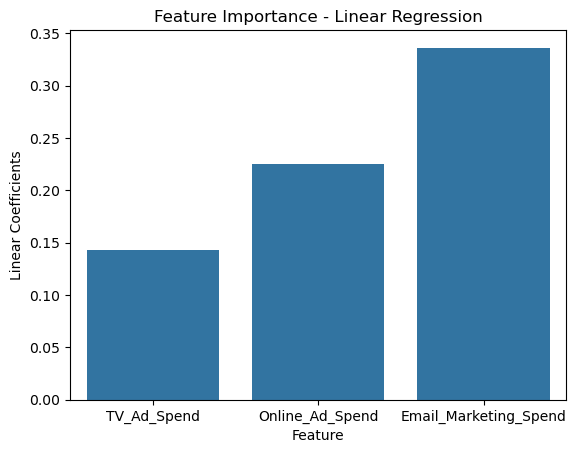

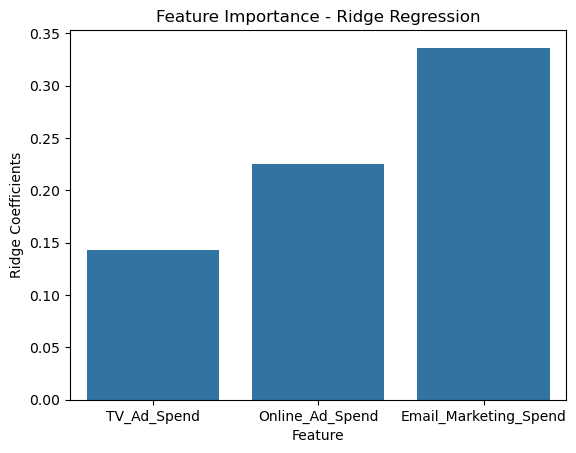

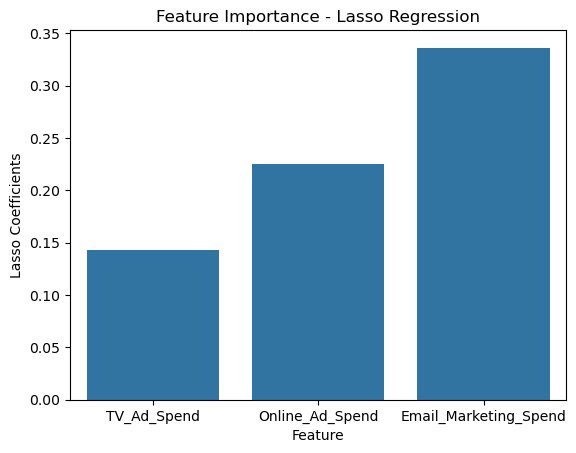

In [16]:
# Step 8: Visualize Results
plt.subplot
sns.barplot(x=coef_df["Feature"], y=coef_df["Linear Coefficients"])
plt.title("Feature Importance - Linear Regression")
plt.show()

sns.barplot(x=coef_df["Feature"], y=coef_df["Ridge Coefficients"])
plt.title("Feature Importance - Ridge Regression")
plt.show()

sns.barplot(x=coef_df["Feature"], y=coef_df["Lasso Coefficients"])
plt.title("Feature Importance - Lasso Regression")
plt.show()

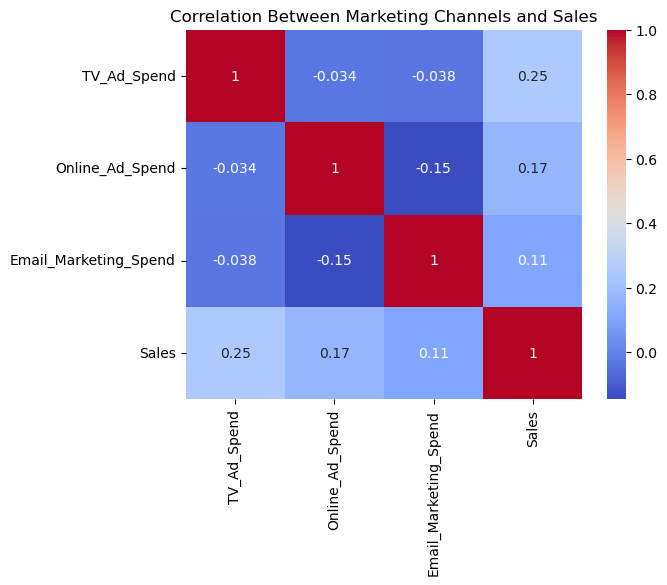

In [19]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Marketing Channels and Sales")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr_model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R²: -0.8826733986045829
RMSE: 7248.41286282087


In [23]:
y_pred = ridge_model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R²: -0.8826733983948978
RMSE: 7248.412862417219


In [24]:
y_pred = lasso_model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R²: -0.8826733343768483
RMSE: 7248.412739180428
